In [1]:
setwd('/data/import/project1//momo-6.12.0.199///runtime/PIPELINE/taxonkit1/a.fel//BJTC-204')

In [2]:
load('./exp4.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'M')

In [6]:
dim(exp4)

[1]   190 11882

In [7]:
table(exp4$TYPE)


Control     MDD 
    130      60 

In [8]:
expr = exp4[,8:11882]
colnames(expr) = gsub('-','.',colnames(expr))
expr <- expr[, !grepl("^\\d+", names(expr))]

In [9]:
expr1 = expr%>%  t() %>%  as.data.frame()

In [10]:
options(repr.plot.height= 5,repr.plot.width = 8)

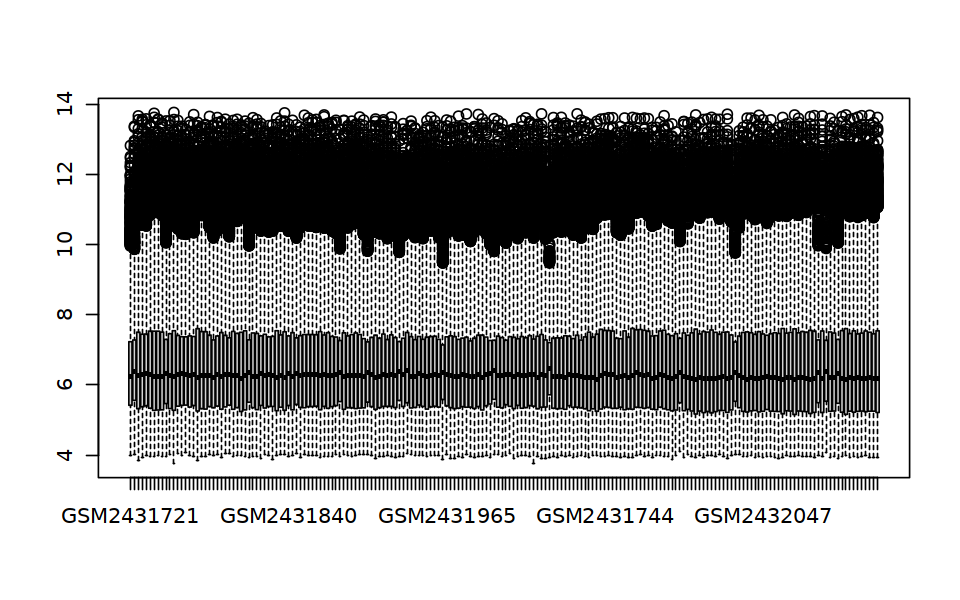

In [11]:
boxplot(expr1)

In [12]:
TYPE = exp4$TYPE

In [13]:
library(limma)
library(dplyr)
f <- TYPE %>% as.factor()

Warning message:
"package 'limma' was built under R version 4.2.3"


In [15]:
desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(MDD - Control, levels = colnames(coef(fit)))
contrast.matrix 

,MDD - Control
Control,-1
MDD,1


In [16]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADARB2,-0.10498147,5.060784,-4.116157,5.726686e-05,0.2466906,1.4827485
BAIAP3,0.19462973,7.883476,3.998534,9.101598e-05,0.2466906,1.0985581
POU2AF1,-0.08662522,4.838906,-3.983235,9.659804e-05,0.2466906,1.0492613
SMC4,-0.07508198,5.225278,-3.955838,1.074176e-04,0.2466906,0.9613724
IFIT3,-0.17100823,6.618539,-3.894624,1.359031e-04,0.2466906,0.7668219
PIM2,0.22064004,7.682283,3.891127,1.377300e-04,0.2466906,0.7557850


In [17]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value		 < 0.05 & abs(logFC) > 0.25,
                                   ifelse(logFC > 0.25 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [18]:
table(diff$change)


 Down   NOT    Up 
    6 11830    23 

In [19]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [20]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

In [21]:
options(repr.plot.width = 5,repr.plot.height = 5)

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


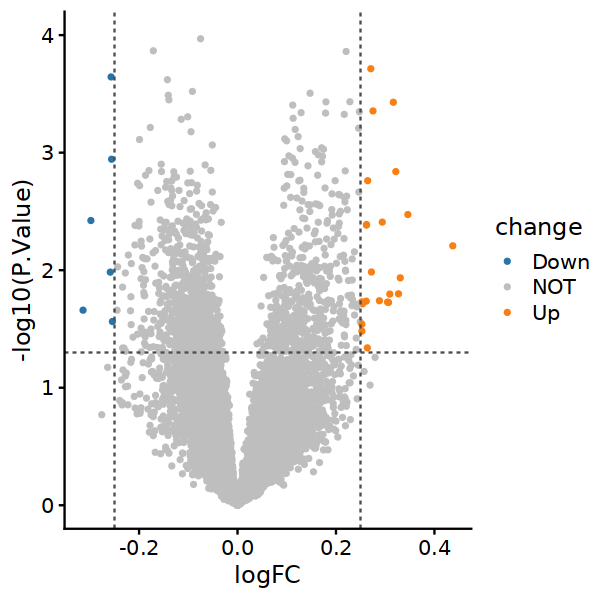

In [22]:
ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
geom_point(aes(color=change),size=1)+
geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
geom_vline(xintercept = c(-0.25,0.25),linetype="dashed",color="grey30")+
geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
scale_color_manual(values = c("#2874A9", "grey", "#F87F13"))+
theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)

In [23]:
tempOutput1 =diff
write.csv(tempOutput1,file = './figure2/res1//diffgene2.csv')

In [27]:
diff2 = diff %>% filter(change %in%  c('Up','Down') )

In [29]:
write.csv(diff2,file = './figure2/res1//diffgene-diffgene.csv')

In [30]:
ggsave('./figure2//res1/fig1.trainset.valcano.pdf',width = 5,height = 5)

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


In [31]:
options(repr.plot.width = 5,repr.plot.height = 6)

In [32]:
df = data.frame(type = c('Up','Down'),
               num = c(23,6))

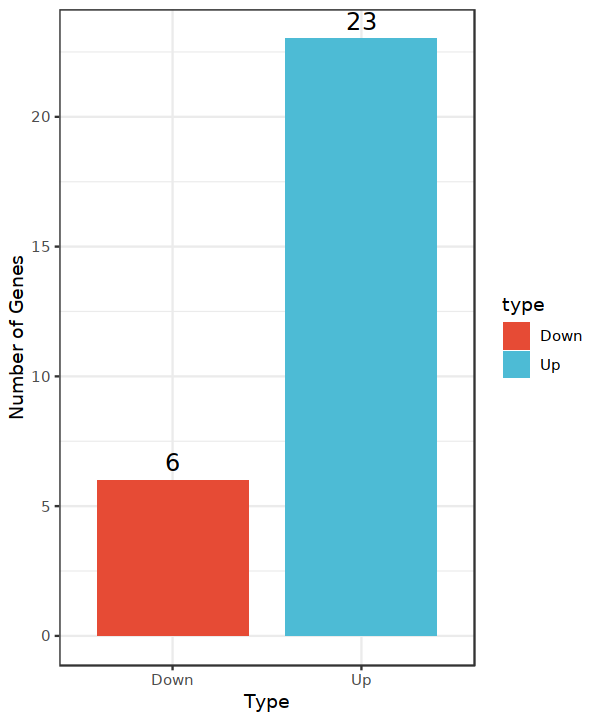

In [33]:
ggplot(df,aes(type,num,fill=type))+
  geom_bar(stat = "identity",width=0.8)+
ggsci::scale_fill_npg() + theme_bw()+geom_text(aes(label=num),size=5,vjust=-0.5) +
ylab('Number of Genes')+xlab('Type')

In [34]:
ggsave('./figure2/res1/fig1.trainset.valcano.barplot.pdf',width = 5,height = 6)

In [35]:
diffgene = tempOutput1 %>%  filter(change != 'NOT') %>% rownames()

In [36]:
exp4 = exp4[ order (exp4$TYPE), ]

In [37]:
forplot = exp4[,diffgene] %>% t() %>% as.data.frame()

In [38]:
library(pheatmap)
dat=t(scale(t(forplot))) 
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1]  29 190

In [39]:
library(pheatmap)
annotation_col = data.frame(exp4$TYPE)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,GSM2431721,GSM2431726,GSM2431727,GSM2431734,GSM2431737,GSM2431738,GSM2431752,GSM2431753,GSM2431756,GSM2431762,...,GSM2431958,GSM2431959,GSM2431969,GSM2431970,GSM2431995,GSM2432065,GSM2432068,GSM2432070,GSM2432077,GSM2432081
SYT5,-1.325089,-1.6190734,0.8787268,-0.4177901,0.4647577,0.7788378,-1.221551,0.70888385,-0.3604440,-1.732830,...,1.491885,1.222566,0.1478482,0.7754658,1.807571,2.00000,1.4006696,1.216895,1.2776815,1.491762
ATP10B,1.304320,0.9325631,0.3649931,0.6149706,-0.1122067,-1.0134155,2.000000,-0.06057643,0.3578008,1.749023,...,-1.107875,-2.000000,-1.0722032,-0.9342793,-1.556768,-1.24502,-0.9287878,-1.658237,-0.9204056,-2.000000


In [40]:
options(repr.plot.width = 8)

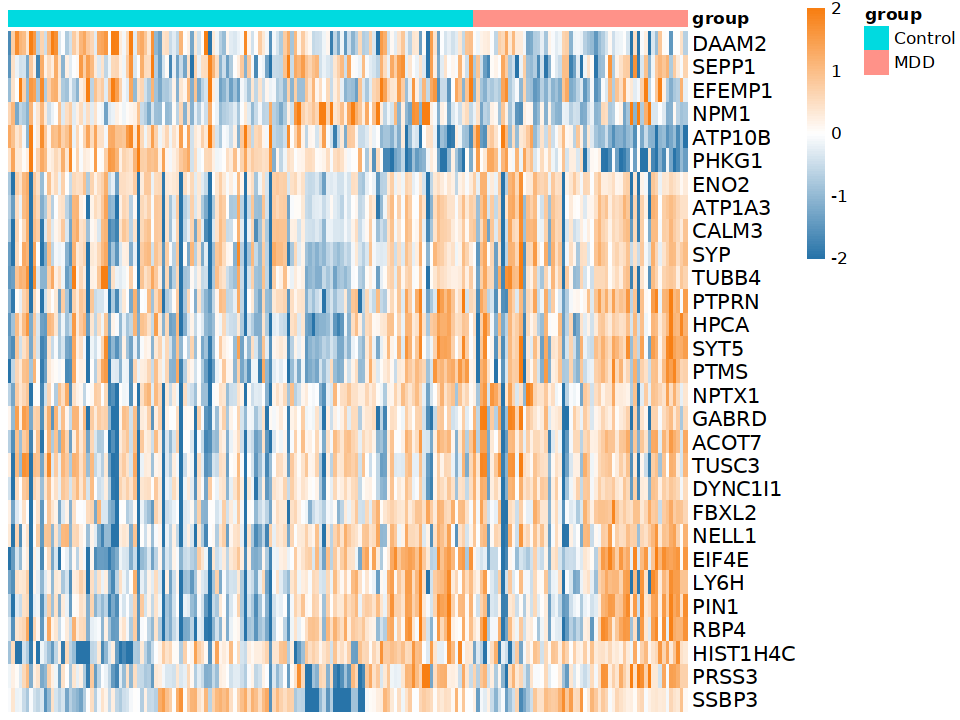

In [41]:
 x  = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 12, treeheight_row = 0,
          fontsize_col = 12,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)
         # angle_col = 45 
)

In [42]:
pdf('./figure2/res1/fig1.trainset.heat.pdf',width = 5,height = 5)
print(x)
dev.off()

png 
  2

In [43]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [44]:
gene_symbol <- bitr(geneID = diffgene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "BH", 
                   minGSSize = 1,   
                   maxGSSize = 500,  
                   qvalueCutoff = 1,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = diffgene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.34% of input gene IDs are fail to map..."


In [45]:
options(repr.plot.height= 5,repr.plot.width = 8)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


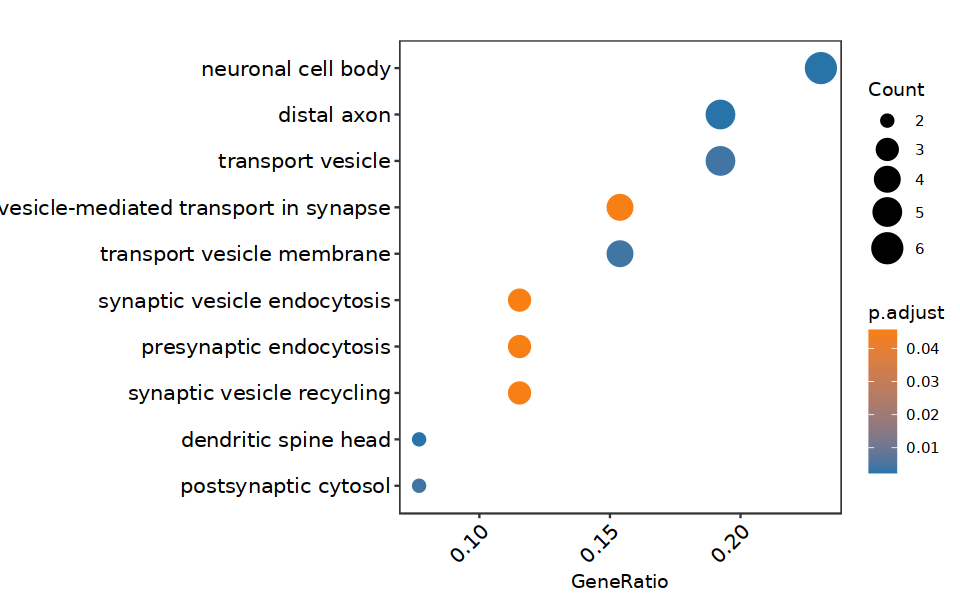

In [46]:
dotplot(BP,showCategory = 10,label_format = 100)+ 
scale_color_gradient(low='#2874A9',high='#F87F13') +
  theme_bw()+
  theme(panel.grid = element_blank(),
        axis.text = element_text(size=12, colour = "black"),
        axis.text.x=element_text(angle=45,hjust = 1,vjust=1))

In [48]:
ggsave('./figure2/res1/fig1.trainset.GO.pdf',width = 6.5,height = 5)
write.csv(BP@result,'./figure2/res1/GO.res.csv')

In [179]:
library(GOplot)
david = BP@result[,c(1,2,3,9,7)] %>%  tibble::remove_rownames()
david$geneID = gsub('[/]',',',david$geneID)
colnames(david) = c('Category','ID','Term','Genes','adj_pval')
genelist = diff %>%  tibble::rownames_to_column(.,'ID') 
genelist = genelist[,c(1:7)]
circ <- circle_dat(david,genelist)
options(repr.plot.width = 13,repr.plot.height = 8)

In [180]:
pdf('./figure2/res1/fig1.trainset.GO2.pdf',height = 8,width = 12)
GOCircle(circ)
dev.off()

png 
  2

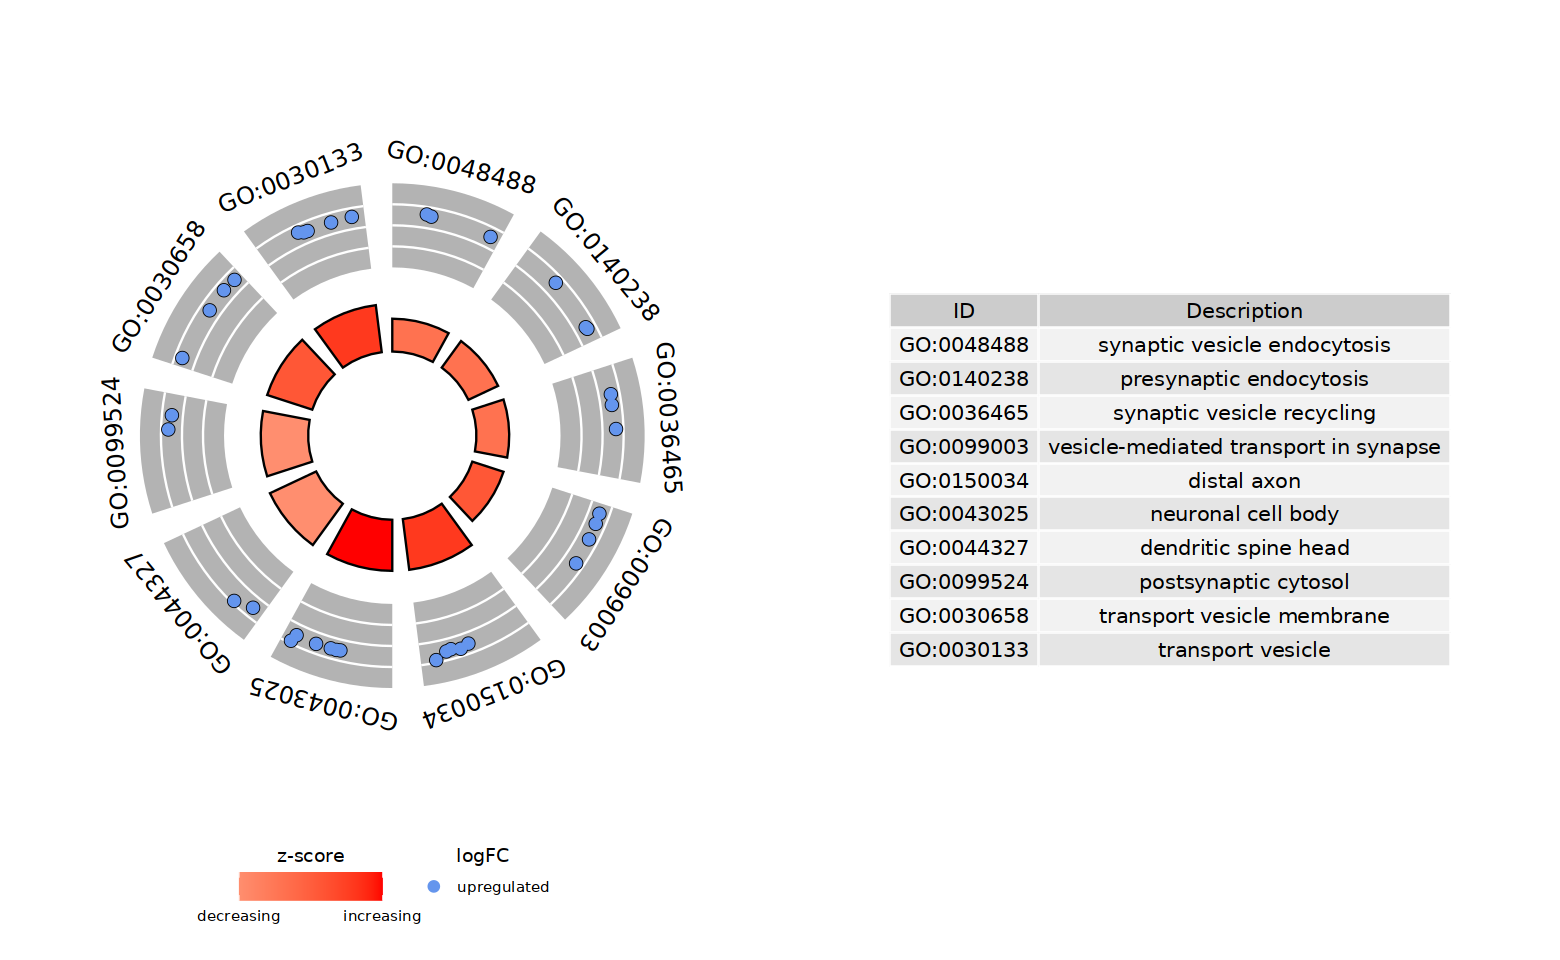

In [181]:
GOCircle(circ)

In [182]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [183]:
gene = gene_symbol$ENTREZID

In [184]:
kk <- enrichKEGG(gene = gene,keyType = "kegg",organism= "human", qvalueCutoff = 0.5, pvalueCutoff=0.05)

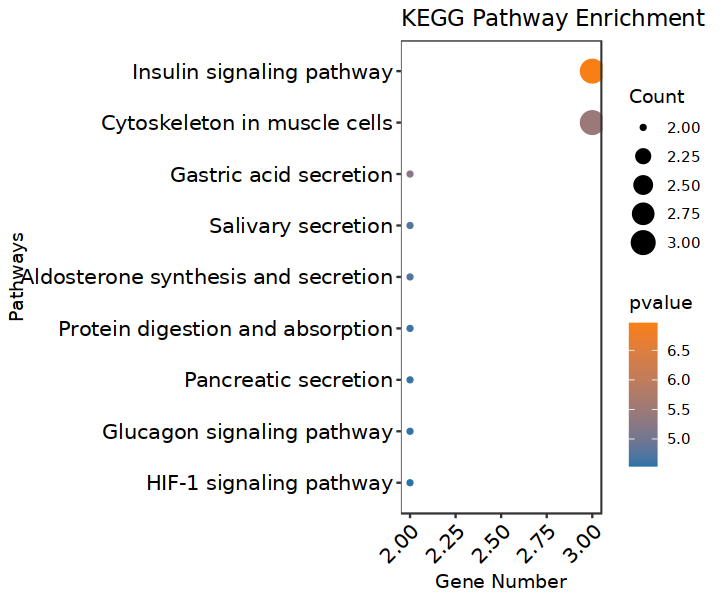

In [185]:
hh <- as.data.frame(kk@result[1:9,])
rownames(hh) <- 1:nrow(hh)
hh$order=factor(rev(as.integer(rownames(hh))),labels = rev(hh$Description))
ggplot(hh,aes(y=order,x=Count))+
geom_point(aes(size=Count,color=-1*log(pvalue)))+# 
scale_color_gradient(low='#2874A9',high='#F87F13') +
labs(color=expression(pvalue,size="Count"), 
     x="Gene Number",y="Pathways",title="KEGG Pathway Enrichment") +theme_bw()+
  theme(panel.grid = element_blank(),
        axis.text = element_text(size=12, colour = "black"),
        axis.text.x=element_text(angle=45,hjust = 1,vjust=1))

In [160]:
ggsave('./figure2/res1/fig1.trainset.kegg.pdf',width = 6,height = 4)

In [186]:
write.csv(kk@result,'./figure2/res1/KEGG.res.csv')

###  gsva

In [187]:
library(clusterProfiler)
library(enrichplot)
library(org.Mm.eg.db)
diff$gene <- rownames(diff)
ids=bitr(diff$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')
diffgene=merge(diff,ids,by.x='gene',by.y='SYMBOL')
head(diff)
cluster3.markers = diffgene

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diff$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"10.13% of input gene IDs are fail to map..."


,logFC,AveExpr,t,P.Value,adj.P.Val,B,change,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ADARB2,-0.10498147,5.060784,-4.116157,5.726686e-05,0.2466906,1.4827485,NOT,ADARB2
BAIAP3,0.19462973,7.883476,3.998534,9.101598e-05,0.2466906,1.0985581,NOT,BAIAP3
POU2AF1,-0.08662522,4.838906,-3.983235,9.659804e-05,0.2466906,1.0492613,NOT,POU2AF1
SMC4,-0.07508198,5.225278,-3.955838,1.074176e-04,0.2466906,0.9613724,NOT,SMC4
IFIT3,-0.17100823,6.618539,-3.894624,1.359031e-04,0.2466906,0.7668219,NOT,IFIT3
PIM2,0.22064004,7.682283,3.891127,1.377300e-04,0.2466906,0.7557850,NOT,PIM2


In [188]:
cluster3.markers <- cluster3.markers[order(cluster3.markers$logFC,decreasing = T),]
cluster3.markers_list <- as.numeric(cluster3.markers$logFC)
names(cluster3.markers_list) <- cluster3.markers$ENTREZID
head(cluster3.markers_list)

478      5763      1977      6855      5646      4062 
0.4372819 0.3460785 0.3269615 0.3215819 0.3164814 0.3093166

In [189]:
cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0]
head(cluster3_de)
length(cluster3_de)

[1] "478"  "5763" "1977" "6855" "5646" "4062"

[1] 10660

In [190]:
cluster3_gsekg1 <- gseKEGG(cluster3.markers_list,organism = "hsa",pvalueCutoff = 0.01)
cluster3_gsekg_arrange1 <- arrange(cluster3_gsekg1,desc(abs(NES)))

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



In [191]:
df = cluster3_gsekg_arrange1@result

In [192]:
write.csv(df,'./figure2/res1/KEGG.GSEA.res.csv')

In [193]:
head(df,3)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa00190,hsa00190,Oxidative phosphorylation,82,0.7897446,3.048286,1e-10,2.638462e-09,1.94332e-09,1689,"tags=76%, list=16%, signal=64%",523/9114/4713/534/9377/7384/527/4706/1349/51079/533/537/27089/4728/4717/6390/526/54205/4723/4701/4726/4694/4708/6392/4712/1329/4724/51606/4720/1537/4696/7385/4710/9296/528/4718/155066/529/535/51382/5464/1347/54539/1345/1351/4725/374291/4698/7381/27068/4697/4695/4702/4711/1340/4704/9167/1327/4709/4714/1350/4722
hsa05016,hsa05016,Huntington disease,223,0.6202689,2.742245,1e-10,2.638462e-09,1.94332e-09,1689,"tags=51%, list=16%, signal=44%",2902/6804/4713/5434/5714/1175/2878/9377/7384/291/163/4706/1349/5685/1173/11258/51079/9519/10376/27089/4728/10121/1212/4717/6390/5693/54205/4723/55860/4701/4726/4694/4708/6392/7277/203068/1742/4712/5694/1211/1329/4724/7280/5705/4720/1537/4696/7385/4710/10381/5682/5695/4718/8678/5438/5684/3831/5718/5601/8408/6647/1347/54539/292/4294/1345/10120/1351/4725/5440/374291/5688/1639/64837/5689/4698/7381/2892/5602/5708/4697/5690/4695/10126/3798/4702/3800/4711/1340/4704/5702/7419/10671/5686/9167/5710/581/10213/5713/10540/9861/1327/161/4709/5432/5687/4714/27113/10105/1350/55081/5719/4722
hsa05012,hsa05012,Parkinson disease,191,0.6187918,2.704455,1e-10,2.638462e-09,1.94332e-09,1762,"tags=55%, list=17%, signal=47%",808/6622/7345/4713/5714/9377/7384/291/4706/1349/5685/51079/816/10376/27089/4728/7317/4717/6390/5693/7295/54205/4723/4701/4726/4694/4708/6392/7277/203068/4712/5694/1329/4724/7280/5705/4720/1537/4696/7385/4710/10381/5682/4137/5695/4718/5684/3831/65018/5718/7494/5601/6647/1347/54539/292/1345/25828/1351/4725/3309/374291/5688/64837/805/5689/2771/4698/7381/7314/1616/4129/5602/5708/4697/5690/4695/3798/4702/3800/4711/1340/4704/5702/7419/5686/9167/5710/581/10213/5713/9861/1327/4709/5687/4714/815/27429/10105/23516/1350/7922/5719/4722/598/84790


In [194]:
library(ggplot2)
library(ggstatsplot)

options(repr.plot.width = 12,repr.plot.height = 5)

df = df[order(df$NES,decreasing = T),]
#设定分组：1--ES>0;   -1--ES<0

up = head(subset(df, NES>0),10);up$group=1
down = tail(subset(df, NES<0),10);down$group=-1
dat=rbind(up,down)


dat$pvalue = dat$NES
dat$pvalue=dat$pvalue

In [195]:
#dat$group = factor(dat$group);str(dat)
# dat$pvalue = -log10(dat$pvalue)
# dat$pvalue=dat$pvalue*dat$group 

In [196]:
options(repr.plot.height = 5,repr.plot.width = 10)

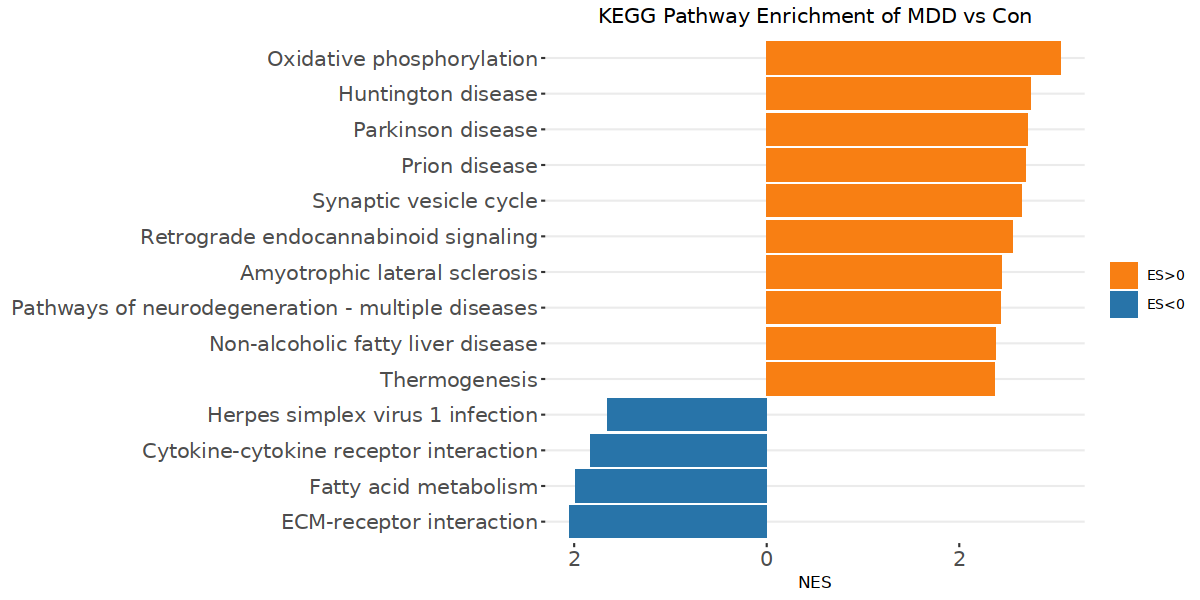

In [197]:
dat=dat[order(dat$pvalue,decreasing = F),]
ggplot(dat, aes(x=reorder(Description,order(pvalue, decreasing = F)), y=pvalue, fill=group)) + 
  geom_bar(stat="identity", aes(fill=factor(group, levels = c(1,-1),  
                                            labels = c("ES>0","ES<0")))) + 
  xlab("") +
  ylab("NES") +
  coord_flip() + 
  theme_ggstatsplot() +
  scale_y_continuous(breaks=c(-4, -2, 0, 2, 4),
                     labels=c("4", "2", "0","2","4")) +
  scale_fill_manual(values = rev(c("#2874A9","#F87F13"))) + 
  theme(plot.title = element_text(size = 12,hjust = 0.5),  
        axis.text = element_text(size = 12,face = 'bold'),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        legend.title = element_blank()) +
  ggtitle("KEGG Pathway Enrichment of MDD vs Con") 

In [198]:
ggsave('./figure2/res1/fig1.trainset.gsekegg.pdf',width = 8,height = 4)

In [200]:
Go_gseresult <- gseGO(cluster3.markers_list, 'org.Hs.eg.db', keyType = "ENTREZID", 
                      ont="ALL", nPerm = 1000, minGSSize = 10, maxGSSize = 1000, pvalueCutoff=0.05)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



In [201]:
cluster3_gsekg_arrange <- arrange(Go_gseresult,desc(abs(NES)))
tail(cluster3_gsekg_arrange,2)

,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0033043,BP,GO:0033043,regulation of organelle organization,872,0.2701379,1.323123,0.002192982,0.03990742,0.0309077,2094,"tags=25%, list=20%, signal=22%",4884/11075/5300/6622/2596/22924/6712/29844/396/3265/4133/60/6604/291/9908/55022/79884/81551/81873/55201/51412/9270/23400/64112/30845/5999/830/6857/11076/5216/2288/375/5864/9530/10552/10059/4591/7249/26355/5604/10109/10574/55737/1778/832/998/6812/6601/51024/2395/811/4137/6742/3984/55294/79837/7014/51510/27069/56947/409/1020/8936/54998/8678/8195/28978/6376/1436/5295/27289/11151/8193/26354/5217/664/11152/83444/65018/51499/5058/5601/28964/50807/23229/8408/2021/11034/2185/8440/23761/51451/2258/5048/10962/292/1496/5594/23616/2067/54828/5881/29978/1639/7203/1627/5119/9637/4836/302/30968/10575/1613/57731/7520/2931/5716/10769/146691/5605/54386/51332/10093/51143/6950/91782/6386/5296/10576/2901/5310/55521/572/11284/6721/5202/9344/5899/3550/7419/8867/9168/11235/11344/5910/8027/54737/26277/23208/29098/581/5290/5138/5580/26999/6421/9587/8396/54732/10419/3925/10458/27113/71/27429/10300/10193/10105/9419/24139/6595/81876/11113/636/8379/1499/8723/3184/7168/10043/598/27243/55353/119/51377/8851/6709/4085/10155/10694/22873/6624/56984/6603/5810/2885/7251/6597/5066/9275/80351/7111/5885/637/402/23204/1459/869/10152/9554/79187/4733/10982/23191/6811/23221
GO:1901565,BP,GO:1901565,organonitrogen compound catabolic process,961,0.2674363,1.316261,0.003264418,0.04350671,0.0336953,1997,"tags=24%, list=19%, signal=21%",4745/25827/11332/5300/1453/1917/6622/7345/54472/11313/5714/2805/1428/7347/79016/3423/4738/3312/149603/9024/5685/8803/23400/51079/7334/80762/3094/11165/116138/3251/7317/3093/27339/5693/80700/11337/9112/4905/5887/23291/5694/5582/6500/7184/7805/4953/112398/8314/55737/5705/65992/5699/10134/7328/27183/5682/10296/811/55294/5695/5094/51510/79176/409/11267/8237/5684/123803/2744/10273/664/65018/5718/253980/7494/5601/51322/2185/11345/23761/10197/644/1036/57003/51160/6478/64854/6880/997/10952/7480/8724/8266/10730/3309/29978/4946/64219/5688/5119/302/6992/5689/25837/10007/7314/9146/7329/79589/5886/2931/4129/5716/10769/5708/11146/1725/127544/5690/23588/5527/5476/23287/57817/116986/2731/138050/51582/91782/6386/3163/79718/7432/9616/1508/5310/23640/8507/51283/81847/978/5702/10444/5686/8533/7341/29761/8027/1642/1595/5710/9491/6049/25898/819/80020/10213/137886/5713/26232/79077/9861/5138/5580/9104/8802/4913/2806/81858/8078/5687/9978/2109/79089/7322/549/10393/5774/27429/23327/2903/10193/7324/25847/8722/26297/1499/20/5719/27005/7267/3326/7389/3320/1892/79888/27243/56922/55353/1116/51377/25939/10755/341/55190/3156/4085/4942/84900/9572/5538/53343/27165/51380/57092/1743/9520/2717/4048/7251/25897/384/2571/10956/1509/55658/23564


In [202]:
df = cluster3_gsekg_arrange@result
write.csv(df,'./figure2/res1/GO.GSEA.res.csv')
library(ggplot2)
library(ggstatsplot)

options(repr.plot.width = 12,repr.plot.height = 5)

df = df[order(df$NES,decreasing = T),]
up = head(subset(df, NES>0),10);up$group=1
down = tail(subset(df, NES<0),10);down$group=-1
dat=rbind(up,down)
dat$pvalue = dat$NES
dat$pvalue=dat$pvalue

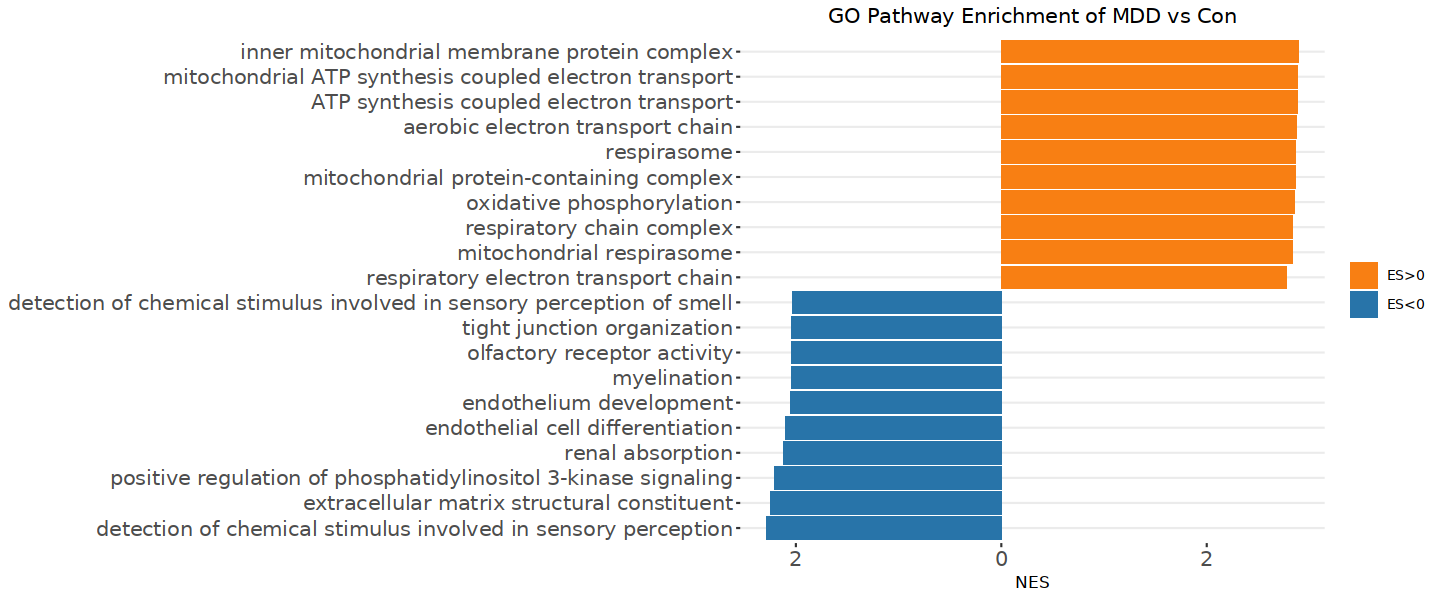

In [203]:
dat=dat[order(dat$pvalue,decreasing = F),]
ggplot(dat, aes(x=reorder(Description,order(pvalue, decreasing = F)), y=pvalue, fill=group)) + 
  geom_bar(stat="identity", aes(fill=factor(group, levels = c(1,-1),  
                                            labels = c("ES>0","ES<0")))) + 
  xlab("") +
  ylab("NES") +
  coord_flip() + 
  theme_ggstatsplot() +
  scale_y_continuous(breaks=c(-4, -2, 0, 2, 4),
                     labels=c("4", "2", "0","2","4")) +
  scale_fill_manual(values = rev(c("#2874A9","#F87F13"))) + 
  theme(plot.title = element_text(size = 12,hjust = 0.5),  
        axis.text = element_text(size = 12,face = 'bold'),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        legend.title = element_blank()) +
  ggtitle("GO Pathway Enrichment of MDD vs Con") 

In [204]:
ggsave('./figure2/res1/fig1.trainset.gsego.pdf',width = 10,height = 4.5)